# CHAPTER 10 - SIMPLE LINEAR REGRESSION

## By Elizabeth Calkins

## What does a Simple Linear Regression Model do?
#### Simple linear regression aims to find a linear relationship to describe the correlation between an independent and possibly dependent variable.

In [7]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [8]:
data = sns.load_dataset('diamonds') 

In [11]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Pearson Correlation Coefficient (r-value)
* A linear relationship between two variables is measured by its r-value, which also tells its direction and intensity.
* The r-value ranges from -1 to 1.
* An r-value of 1 shows a positive correlation, meaning as one variable increases, the other increases too.
* An r-value of -1 shows a negative correlation, meaning that as one variable increases, the other decreases.
* An r-value of 0 shows no linear correlation between the variables.

In [21]:
num_data = data.select_dtypes(include=['number'])
corr_matrix = numeric_data.corr()
corr_matrix.head(7)

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


<Axes: >

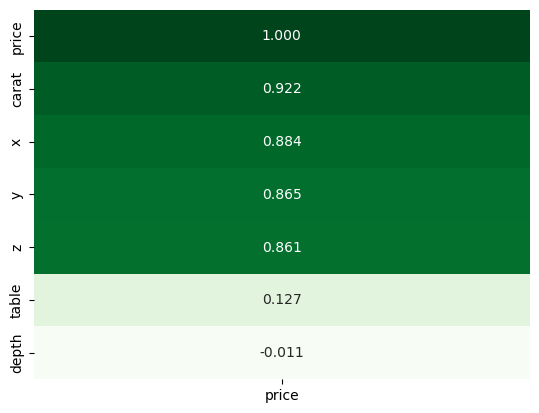

In [24]:
price_corr = num_data.corr()['price'].sort_values(ascending=False)
sns.heatmap(price_corr.to_frame(), annot=True, fmt=".3f",cmap="Greens", cbar=False)

## Procedure for Creating and Using a Regression Model
1. Split the dataset.
2. Create model from training dataset.
3. Validate model with test dataset.
4. If model is valid, predict data with it. 

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

In [33]:
x_train, x_test, y_train, y_test = train_test_split(
    data[['carat']],data[['price']],
    test_size=0.30, random_state=20)

In [36]:
model = LinearRegression()
print(model)

LinearRegression()


In [39]:
model.fit(x_train, y_train)
print(model)

LinearRegression()


In [42]:
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8504107786474794

In [45]:
y_predicted = model.predict(x_test)
y_predicted

array([[9540.64191438],
       [1940.07543252],
       [3180.98424589],
       ...,
       [9618.19871522],
       [-464.18539337],
       [5507.68827094]])

In [48]:
predicted = pd.DataFrame(y_predicted, columns=['predicted_price'])
predicted.head(3)

,predicted_price
0,9540.641914
1,1940.075433
2,3180.984246


In [51]:
predicted_df = pd.DataFrame(y_predicted, columns=['predicted_price']).reset_index(drop=True)
joined_df = pd.concat([x_test.reset_index(drop=True), 
                        y_test.reset_index(drop=True), 
                        predicted_df], axis=1)
joined_df.head()

,carat,price,predicted_price
0,1.52,8674,9540.641914
1,0.54,1637,1940.075433
2,0.70,2657,3180.984246
3,0.59,1838,2327.859437
4,0.86,2980,4421.893059


In [54]:
melted_df = pd.melt(joined_df, id_vars=['carat'], value_vars=['price', 'predicted_price'],
                    var_name='price_type', value_name='price_value')
melted_df

,carat,price_type,price_value
0,1.52,price,8674.000000
1,0.54,price,1637.000000
2,0.70,price,2657.000000
3,0.59,price,1838.000000
4,0.86,price,2980.000000
...,...,...,...
32359,0.31,predicted_price,156.269013
32360,1.01,predicted_price,5585.245072
32361,1.53,predicted_price,9618.198715
32362,0.23,predicted_price,-464.185393


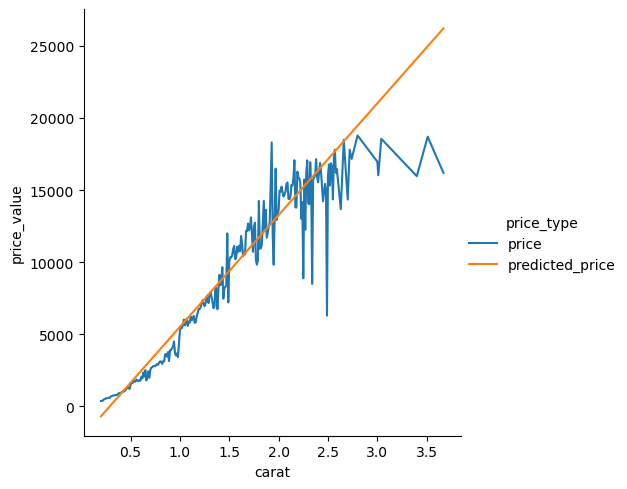

In [57]:
sns.relplot(kind = 'line', data=melted_df, x='carat', y='price_value', hue='price_type', errorbar=('ci', False))

## Regression line equation is **y = mx + b**, where...
* y is the **dependent** variable
* m is the **slope** of the line
* x is the **independent** variable
* b is the **Y-intercept**

In [64]:
X = data.carat.values.reshape(-1,1)
y = data.price

In [67]:
lr = LinearRegression()
predicted = lr.fit(X,y)

In [114]:
slope = predicted.coef_
intercept = predicted.intercept_
print(f'The slope is {slope} and the y-intercept is {intercept}')

The slope is [7756.42561797] and the y-intercept is -2256.360580045403


In [116]:
print(f'Regression line equation is y = {slope[0]:.11f}x + {intercept:.11f}')

Regression line equation is y = 7756.42561796844x + -2256.36058004540


In [128]:
carat_value = 0.70
predicted_price = slope * carat_value + intercept
predicted_price = predicted_price.item()
print(f'The predicted price for a {carat_value} carat diamond is ${predicted_price:,.2f}')

The predicted price for a 0.7 carat diamond is $3,173.14


In [130]:
carat_value = 0.54
predicted_price = slope * carat_value + intercept
predicted_price = predicted_price.item()
print(f'The predicted price for a {carat_value} carat diamond is ${predicted_price:,.2f}')

The predicted price for a 0.54 carat diamond is $1,932.11


#### The estimates in the previous two cells are fairly close to the predicted prices in the results of step 18